In [961]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [962]:
# Load data
train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')

Ok. Vamos dar uma olhada na página do desafio e ver o que eles falam sobre os dados por lá.

<img src="images/01.png" width="800"/>

In [963]:
# Visualizar as primeiras linhas do conjunto de treinamento
train_data.head(10)
# ... criar a primeira versão da descrição de features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [964]:
# Ver a qualidade dos dados
print(f'Total samples: {len(train_data)}')
train_data.isnull().sum()

Total samples: 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [965]:
# Action 01: Change the string column to a numerical one
train_data['Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})

In [966]:
# Action 02: Embarked is spread into three columns (C, S and Q)
dummy_embarked = pd.get_dummies(train_data['Embarked'], 'Emb')
train_data = pd.concat([train_data, dummy_embarked], axis=1)
train_data = train_data.drop(['Embarked'], axis=1)

In [967]:
# Action 03: Splitting the name column into surname and title columns
# Dividindo a coluna 'Nome' para extrair 'Sobrenome' e 'Título'
train_data['Surname'] = train_data['Name'].str.split(',').str[0]
train_data['Title']   = train_data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

# Descartando a coluna original 'Nome'
train_data = train_data.drop('Name', axis=1)

train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb_C,Emb_Q,Emb_S,Surname,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,Braund,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,Cumings,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Heikkinen,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,Futrelle,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1,Allen,Mr


In [968]:
train_data['Surname'].value_counts()

# ... it doesn't seem to matter

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Surname, Length: 667, dtype: int64

In [969]:
# Action 05: Cabin seems to be irrelevant
# Tem muita coisa irrelevante
train_data.drop('Surname', axis=1, inplace=True)

In [970]:
# Contagem de valores únicos na coluna 'Title'
title_counts = train_data['Title'].value_counts()

print(title_counts)
# ... it seems relevant


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


In [971]:
# Action 04: Title to dummy, with Mr, Miss, Mrs, Master and Others
# Definindo um limite para o número de títulos
threshold = 30

# Aplicando a função lambda para substituir títulos com contagem menor que o limite por 'Others'
train_data['Title'] = train_data['Title'].apply(lambda x: x if title_counts[x] >= threshold else 'Others')

print("--------------------")
# Verificando o resultado
print(train_data['Title'].value_counts())

dummy_title = pd.get_dummies(train_data['Title'])
train_data = pd.concat([train_data, dummy_title], axis=1)
train_data = train_data.drop('Title', axis=1)

--------------------
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64


In [972]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Emb_C        891 non-null    uint8  
 11  Emb_Q        891 non-null    uint8  
 12  Emb_S        891 non-null    uint8  
 13  Master       891 non-null    uint8  
 14  Miss         891 non-null    uint8  
 15  Mr           891 non-null    uint8  
 16  Mrs          891 non-null    uint8  
 17  Others       891 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(8)
memor

In [973]:
# Action 05: Fill NULL age values
# Calcular a média da idade para cada grupo (classe, sexo, sobreviveu)
age_medians = train_data.groupby(['Pclass', 'Sex'])['Age'].median()

# Função para preencher os valores NaN da idade
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_medians[row['Pclass'], row['Sex']]
    else:
        return row['Age']

# Aplicar a função para preencher os valores NaN
train_data['Age'] = train_data.apply(fill_age, axis=1)


In [974]:
# Verificar se há unicidade
print("IDs únicos:", train_data['PassengerId'].nunique() == len(train_data))


IDs únicos: True


In [975]:
# Action 06: 
train_data.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [976]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Master,Miss,Mr,Mrs,Others
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.112424,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.044893,0.204265,0.580247,0.140292,0.030303
std,0.486592,0.836071,0.477990,13.304424,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.207186,0.403390,0.493796,0.347485,0.171516
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [977]:
# sns.pairplot(train_data)

<Axes: >

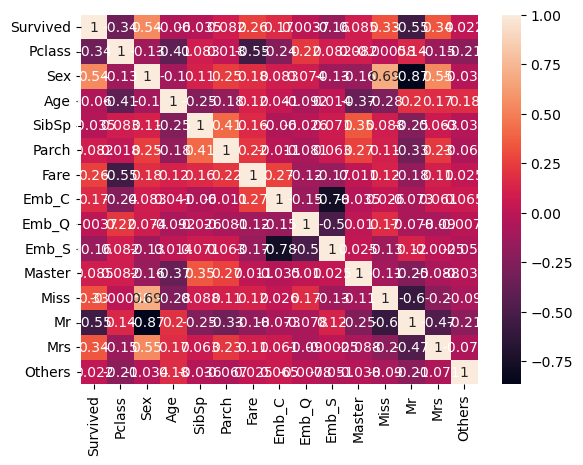

In [978]:
sns.heatmap(train_data.corr(), annot=True)

<Axes: >

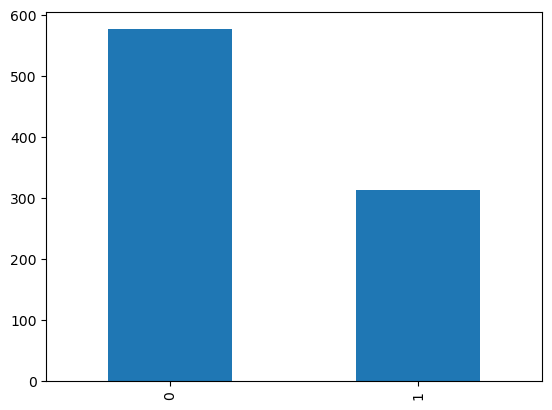

In [979]:
train_data['Sex'].value_counts().plot.bar()

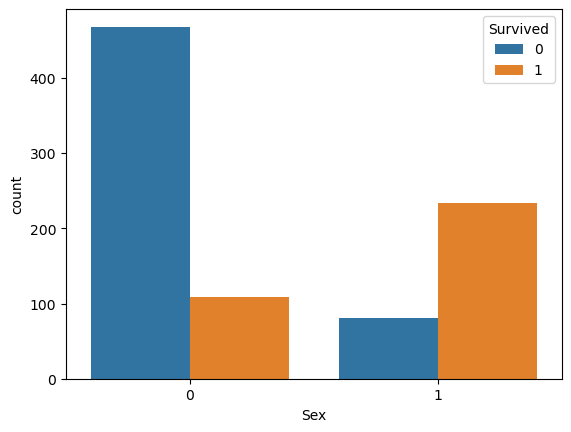

In [980]:
# Analisar mortes por gênero
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()

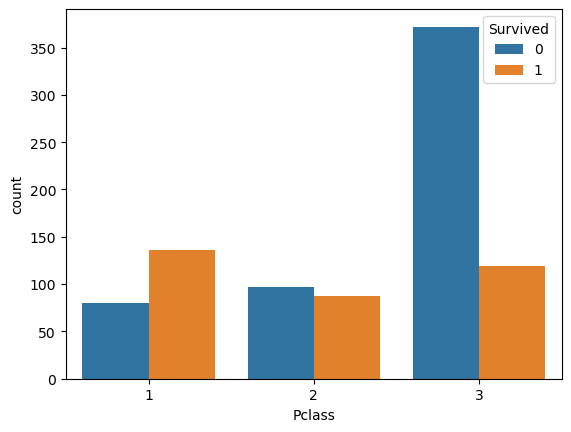

In [981]:
# Analisar mortes por classe
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.show()

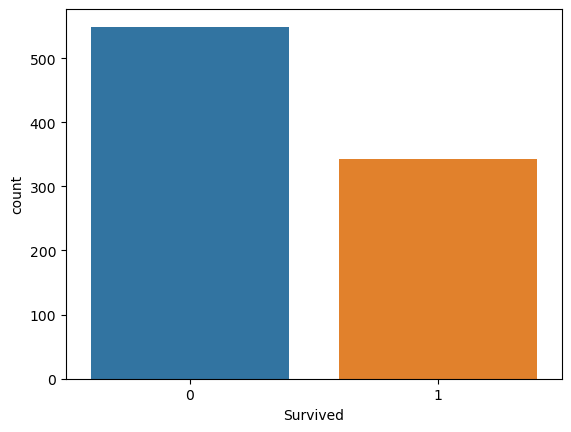

In [982]:
# Visualizações
sns.countplot(x='Survived', data=train_data)
plt.show()

<Axes: xlabel='Pclass'>

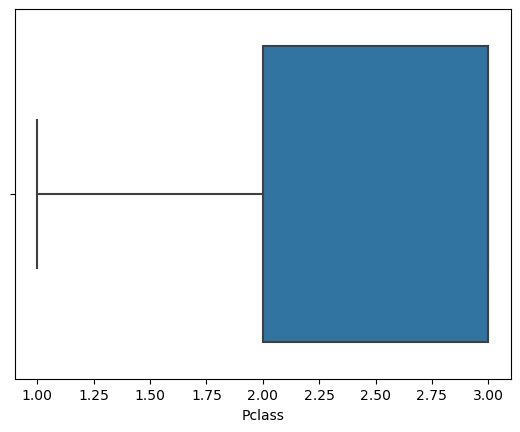

In [983]:
sns.boxplot(x='Pclass', data=train_data)


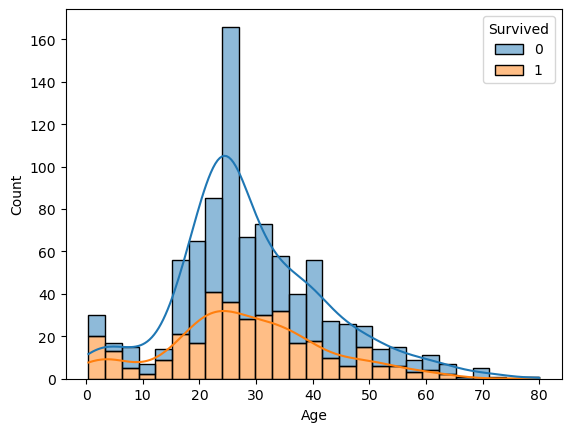

In [984]:
# Plotar o histograma
sns.histplot(x='Age', hue='Survived', multiple="stack", data=train_data, kde=True)
plt.show()



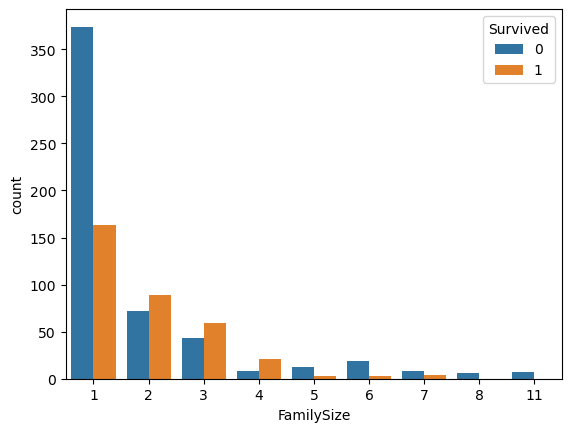

In [985]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=train_data)
plt.show()


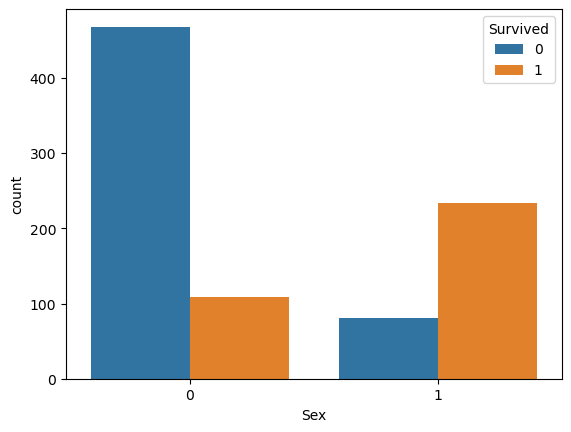

In [986]:
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()


In [987]:
# Verificar valores nulos
train_data.isnull().sum()
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Emb_C         0
Emb_Q         0
Emb_S         0
Master        0
Miss          0
Mr            0
Mrs           0
Others        0
FamilySize    0
dtype: int64

# Training

In [988]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

In [989]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [990]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
}

# Treinar e avaliar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    print(f'{name}: {accuracy}')


Logistic Regression: 0.8212290502793296
Decision Tree: 0.770949720670391


Random Forest: 0.8268156424581006
Gradient Boosting: 0.8100558659217877
Support Vector Classifier: 0.6703910614525139


In [991]:
def preprocessing(train_data, test=False):
    # Action 01: Change the string column to a numerical one
    train_data['Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})
    
    # Action 02: Embarked is spread into three columns (C, S and Q)
    dummy_embarked = pd.get_dummies(train_data['Embarked'], 'Emb')
    train_data = pd.concat([train_data, dummy_embarked], axis=1)
    train_data = train_data.drop(['Embarked'], axis=1)
    
    # Action 03: Splitting the name column into surname and title columns
    # Changed -> surname is not relevant
    # train_data['Surname'] = train_data['Name'].str.split(',').str[0]
    train_data['Title']   = train_data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
    train_data = train_data.drop('Name', axis=1)
    
    # Action 04: Title to dummy, with Mr, Miss, Mrs, Master and Others
    threshold = 30
    title_counts = train_data['Title'].value_counts()
    train_data['Title'] = train_data['Title'].apply(lambda x: x if title_counts[x] >= threshold else 'Others')
    dummy_title = pd.get_dummies(train_data['Title'])
    train_data = pd.concat([train_data, dummy_title], axis=1)
    train_data = train_data.drop('Title', axis=1)

    # Action 05: Fill NULL age values
    # Preencher valores NaN com a mediana da coluna 'Age'
    train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

    # Aplicar a função ceil e converter para inteiros
    train_data['Age'] = train_data['Age'].apply(np.ceil).astype(int)

        # # Calcular a média da idade para cada grupo (classe, sexo, sobreviveu)
        # age_medians = train_data.groupby(['Pclass', 'Sex', 'Survived'])['Age'].median()

        # # Função para preencher os valores NaN da idade
        # def fill_age(row):
        #     if pd.isnull(row['Age']):
        #         return age_medians[row['Pclass'], row['Sex'], row['Survived']]
        #     else:
        #         return row['Age']

        # # Aplicar a função para preencher os valores NaN
        # train_data['Age'] = train_data.apply(fill_age, axis=1)
        # train_data['Age'] = train_data['Age'].apply(np.ceil).astype(int)

    # Action 06: PassengerId, Cabin and Ticket seem to be irrelevant
    if test:
        train_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)   
    else:    
        train_data.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)   
    
    # Action 07: Family size of each passenger
    train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
    
    if not test:
        train_data = train_data.dropna()
    else:
        train_data.fillna(train_data.mean(), inplace=True)

    
    return train_data

In [992]:

# Após pré-processar o conjunto de treinamento
expected_columns = train_data.columns

test_data = preprocessing(test_data, test=True)
passengerId = test_data['PassengerId']
test_data.drop('PassengerId', axis=1, inplace=True)

# Após pré-processar o conjunto de teste
for col in expected_columns:
    if col not in test_data.columns:
        test_data[col] = 0

# Reordenar as colunas do conjunto de teste
test_data = test_data[expected_columns]
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Master,Miss,Mr,Mrs,Others,FamilySize
0,0,3,0,35,0,0,7.8292,0,1,0,0,0,1,0,0,1
1,0,3,1,47,1,0,7.0000,0,0,1,0,0,0,1,0,2
2,0,2,0,62,0,0,9.6875,0,1,0,0,0,1,0,0,1
3,0,3,0,27,0,0,8.6625,0,0,1,0,0,1,0,0,1
4,0,3,1,22,1,1,12.2875,0,0,1,0,0,0,1,0,3


In [993]:
test_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Emb_C         0
Emb_Q         0
Emb_S         0
Master        0
Miss          0
Mr            0
Mrs           0
Others        0
FamilySize    0
dtype: int64

In [994]:
test_data.shape
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Master,Miss,Mr,Mrs,Others,FamilySize
0,0,3,0,35,0,0,7.8292,0,1,0,0,0,1,0,0,1
1,0,3,1,47,1,0,7.0000,0,0,1,0,0,0,1,0,2
2,0,2,0,62,0,0,9.6875,0,1,0,0,0,1,0,0,1
3,0,3,0,27,0,0,8.6625,0,0,1,0,0,1,0,0,1
4,0,3,1,22,1,1,12.2875,0,0,1,0,0,0,1,0,3


In [995]:
print(test_data.shape)
print(train_data.shape)

test_data.head()

(418, 16)
(891, 16)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Master,Miss,Mr,Mrs,Others,FamilySize
0,0,3,0,35,0,0,7.8292,0,1,0,0,0,1,0,0,1
1,0,3,1,47,1,0,7.0000,0,0,1,0,0,0,1,0,2
2,0,2,0,62,0,0,9.6875,0,1,0,0,0,1,0,0,1
3,0,3,0,27,0,0,8.6625,0,0,1,0,0,1,0,0,1
4,0,3,1,22,1,1,12.2875,0,0,1,0,0,0,1,0,3


In [996]:
# Escolha o melhor modelo
best_model = models['Logistic Regression']

# Fazer previsões no conjunto de teste
test_predictions = best_model.predict(test_data.drop('Survived', axis=1))

# Preparar arquivo de submissão
submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)
